# Raising Awareness Of Air Pollution In Nigeria


## Importing necessary libraries for analysis



In [5]:
# Importing libraries
import pandas as pd
import numpy as np

In [2]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset and checking the data

In [6]:
# Load the dataset
air = pd.read_csv("/content/drive/MyDrive/AirQuality/Port Harcourt, Nigeria (4.80678 7.002953).csv")

In [7]:
# Preview the top of our data
air.head(10)

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59 UTC,198,89,50,40.78
1,2021-07-26 16:48:03 UTC,199,89,50,40.09
2,2021-07-26 16:49:59 UTC,200,89,50,37.93
3,2021-07-26 16:54:03 UTC,201,89,50,33.18
4,2021-07-26 16:55:59 UTC,202,89,50,37.84
5,2021-07-26 16:58:11 UTC,203,89,50,34.70
6,2021-07-26 17:00:08 UTC,204,89,51,33.83
7,2021-07-26 17:02:05 UTC,205,89,50,36.20
8,2021-07-26 17:04:02 UTC,206,89,50,32.63
9,2021-07-26 17:06:00 UTC,207,88,50,32.60


In [8]:
# Preview the bottom of our data
air.tail(10)

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
56042,2021-10-25 09:18:40 UTC,56240,86,62,28.88
56043,2021-10-25 09:20:40 UTC,56241,86,61,26.74
56044,2021-10-25 09:22:42 UTC,56242,87,61,28.71
56045,2021-10-25 09:24:44 UTC,56243,87,61,31.04
56046,2021-10-25 09:26:47 UTC,56244,87,61,28.90
56047,2021-10-25 09:28:43 UTC,56245,87,61,29.17
56048,2021-10-25 09:30:43 UTC,56246,87,61,29.57
56049,2021-10-25 09:32:44 UTC,56247,87,61,28.75
56050,2021-10-25 09:34:44 UTC,56248,87,61,29.97
56051,2021-10-25 09:36:44 UTC,56249,87,60,30.25


In [9]:
# Checking the shape of our data
air.shape

(56052, 5)

Our dataset has 56052 observations and 5 features/variables.

In [10]:
# Let's describe the data
air.describe()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
count,56052.000000,56052.000000,56052.000000,56052.000000
mean,28223.500000,84.821469,65.117766,54.391926
std,16180.962981,4.319505,8.550730,42.205997
min,198.000000,70.000000,29.000000,0.780000
25%,14210.750000,82.000000,61.000000,30.170000
50%,28223.500000,84.000000,68.000000,41.450000
75%,42236.250000,87.000000,71.000000,61.190000
max,56249.000000,108.000000,89.000000,568.080000


The minimum and max value for the PM2.5 feature are too wide apart. The max and the 75% value are also too far apart as well. This leads to a suspicion of outliers present. We will check for these as we go through the project.

In [11]:
# Checking the info of our data
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       56052 non-null  object 
 1   entry_id         56052 non-null  int64  
 2   Temperature_F    56052 non-null  int64  
 3   Humidity_%       56052 non-null  int64  
 4   PM2.5_ATM_ug/m3  56052 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ MB


The created_at column is an object, however this column's data points are date and time observations which we could transform and separate into date and time columns.

All the other columns are of numeric data type ie. int64 or float64

### Cleaning the data

In [12]:
# Let's check for missing values
air.isnull().sum().sum()

0

We have no null values in the dataset.

In [13]:
# Let's check for duplicates
air.duplicated().sum().sum()

0

There are no duplicated observations.

In [14]:
# Are there any unique values in each column entry in the dataset?
for i in air.columns:
 print(air[i].unique())
 print ("\n")

['2021-07-26 16:45:59 UTC' '2021-07-26 16:48:03 UTC'
 '2021-07-26 16:49:59 UTC' ... '2021-10-25 09:32:44 UTC'
 '2021-10-25 09:34:44 UTC' '2021-10-25 09:36:44 UTC']


[  198   199   200 ... 56247 56248 56249]


[ 89  88  87  86  85  84  83  82  81  78  90  91  92  93  94  96  95  97
  98  99 100 101 102  79  80  75  76  77 103  73 104 105 106  70  74 107
 108  72]


[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 49 48 47 46 45 44
 43 42 41 40 39 38 37 36 35 34 33 30 29 31 32 68 70 71 72 69 86 85 84 83
 82 81 80 79 78 77 76 75 74 73 87 89 88]


[40.78 40.09 37.93 ... 83.85 80.34  6.64]




There are no unique values. This is because our data does not consist of categorical variables. All varaiables are continuous in nature and of date-time type.

(56052, 5)


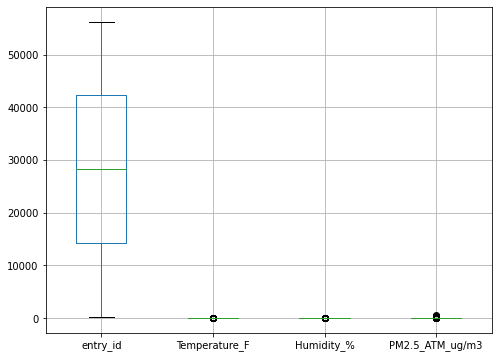

In [15]:
# checking for outliers 
air.boxplot(figsize=(8, 6), fontsize=10)

# print size of the data with outliers present
print(air.shape)

In [16]:
# Let's check the ouliers present in the PM2.5 clearly 
# as the boxplot is not quite as clear.

# Checking for outliers in the PM2.5 column

Q1 = air["PM2.5_ATM_ug/m3"].quantile(0.25)
Q3 = air["PM2.5_ATM_ug/m3"].quantile(0.75)

IQR = Q3 - Q1

outliers = ((air["PM2.5_ATM_ug/m3"] < Q1 - 1.5 * IQR) | (air["PM2.5_ATM_ug/m3"] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    50004
True      6048
Name: PM2.5_ATM_ug/m3, dtype: int64

In [17]:
# Checking for outliers in the Temperature_F column

Q1 = air["Temperature_F"].quantile(0.25)
Q3 = air["Temperature_F"].quantile(0.75)

IQR = Q3 - Q1

outliers = ((air["Temperature_F"] < Q1 - 1.5 * IQR) | (air["Temperature_F"] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    54304
True      1748
Name: Temperature_F, dtype: int64

In [18]:
# Checking for outliers in the Humidity_% column

Q1 = air["Humidity_%"].quantile(0.25)
Q3 = air["Humidity_%"].quantile(0.75)

IQR = Q3 - Q1

outliers = ((air["Humidity_%"] < Q1 - 1.5 * IQR) | (air["Humidity_%"] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    54322
True      1730
Name: Humidity_%, dtype: int64

Seems that there are quite a number of outliers in the columns;

* PM2.5 column (6048 outlires)

* Temperature_F (1748 outliers)

* Humidity_% (1730 outliers)

However we will not drop them as they could be relevant to the study.

In [19]:
# Let's transform the created_at column into date and time
# First Let's create a copy of our data set
air_df = air.copy()

# Let's check if our copy has been made
air_df.head()

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59 UTC,198,89,50,40.78
1,2021-07-26 16:48:03 UTC,199,89,50,40.09
2,2021-07-26 16:49:59 UTC,200,89,50,37.93
3,2021-07-26 16:54:03 UTC,201,89,50,33.18
4,2021-07-26 16:55:59 UTC,202,89,50,37.84


In [20]:
# Let's separate the column created_at into date and time columns
air_df['date'] = pd.to_datetime(air_df['created_at']).dt.date
air_df['time'] = pd.to_datetime(air_df['created_at']).dt.time

In [21]:
# Let's check if our columns have been created
air_df.head()

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,date,time
0,2021-07-26 16:45:59 UTC,198,89,50,40.78,2021-07-26,16:45:59
1,2021-07-26 16:48:03 UTC,199,89,50,40.09,2021-07-26,16:48:03
2,2021-07-26 16:49:59 UTC,200,89,50,37.93,2021-07-26,16:49:59
3,2021-07-26 16:54:03 UTC,201,89,50,33.18,2021-07-26,16:54:03
4,2021-07-26 16:55:59 UTC,202,89,50,37.84,2021-07-26,16:55:59


Our columns have been created so let's drop the created_at column.

In [22]:
# Dropping the created_at column
air_df.drop(columns=['created_at'],inplace=True)
# checking if column is dropped
air_df.head()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,date,time
0,198,89,50,40.78,2021-07-26,16:45:59
1,199,89,50,40.09,2021-07-26,16:48:03
2,200,89,50,37.93,2021-07-26,16:49:59
3,201,89,50,33.18,2021-07-26,16:54:03
4,202,89,50,37.84,2021-07-26,16:55:59


In [25]:
# Rearranging the columns
air_df = air_df[['date', 'time', 'Temperature_F', 'Humidity_%','PM2.5_ATM_ug/m3']]
# Let's check the rearrangement
air_df.head()

,date,time,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26,16:45:59,89,50,40.78
1,2021-07-26,16:48:03,89,50,40.09
2,2021-07-26,16:49:59,89,50,37.93
3,2021-07-26,16:54:03,89,50,33.18
4,2021-07-26,16:55:59,89,50,37.84


## Exploratory Data Analysis